In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
df= pd.read_csv('Plan_Growth_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [3]:
print('shape of the dataframe: ', df.shape )
df.isnull().sum()

shape of the dataframe:  (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.shape[1]

8

In [5]:
df.shape[0]

2200

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
#EDA 

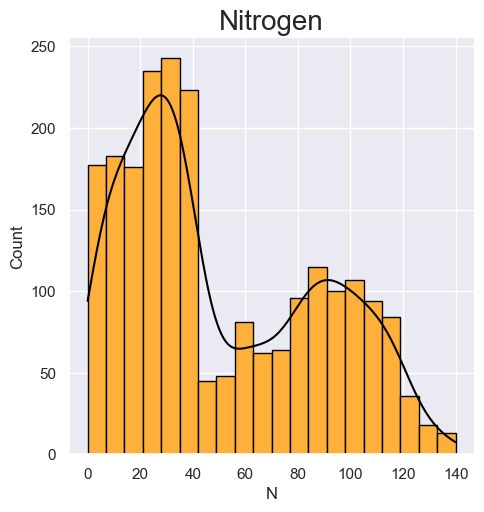

In [10]:
sns.displot(x=df['N'], bins=20, kde=True, edgecolor='black', color='black', facecolor='#ffb03b')
plt.title('Nitrogen', size=20)
plt.show()

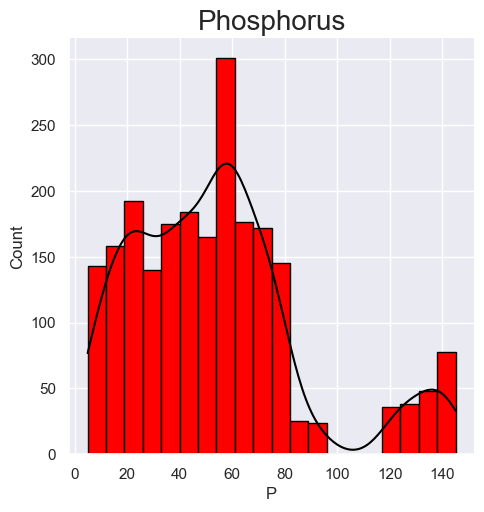

In [11]:
sns.displot(x=df['P'], bins=20, kde=True, edgecolor='black', color='black', facecolor='red')
plt.title('Phosphorus', size=20)
plt.xticks(range(0,150,20))
plt.show()

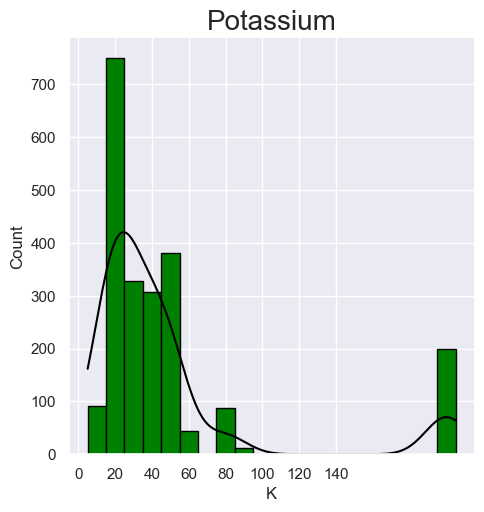

In [12]:
sns.displot(x=df['K'], bins=20, kde=True, edgecolor='black', color='black', facecolor='green')
plt.title('Potassium', size=20)
plt.xticks(range(0,150,20))
plt.show()

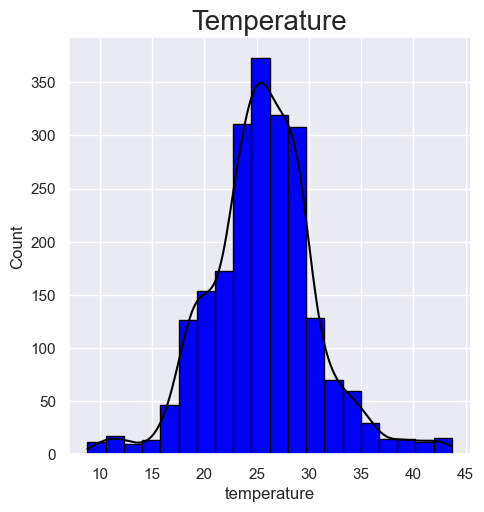

In [13]:
sns.displot(x=df['temperature'], bins=20, kde=True, edgecolor='black', color='black', facecolor='blue')
plt.title('Temperature', size=20)
plt.show()

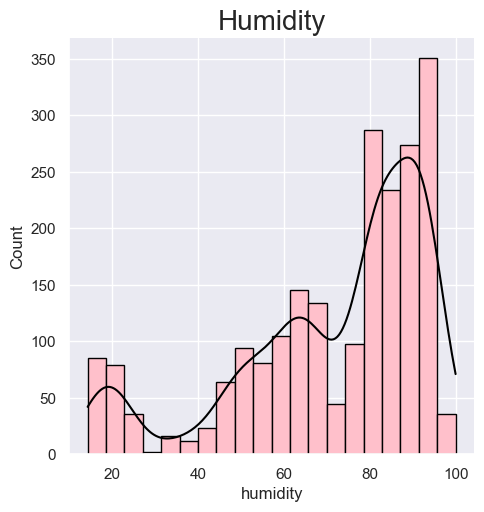

In [14]:
sns.displot(x=df['humidity'], bins=20, kde=True, edgecolor='black', color='black', facecolor='pink')
plt.title('Humidity', size=20)
plt.show()

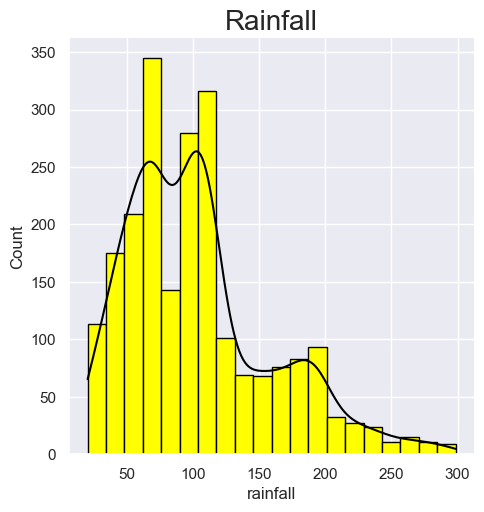

In [15]:
sns.displot(x=df['rainfall'], bins=20, kde=True, edgecolor='black', color='black', facecolor='yellow')
plt.title('Rainfall', size=20)
plt.show()

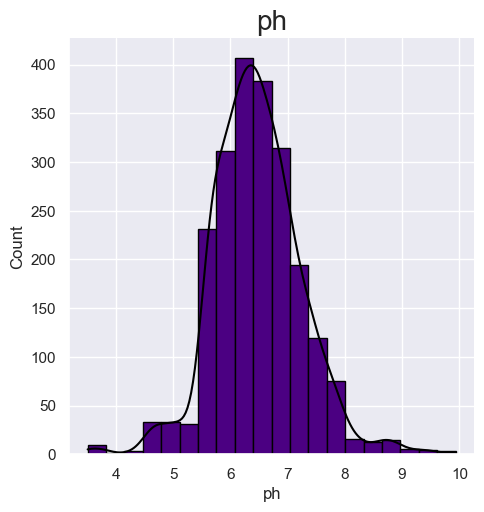

In [16]:
sns.displot(x=df['ph'], bins=20, kde=True, edgecolor='black', color='black', facecolor='indigo')
plt.title('ph', size=20)
plt.show()

In [17]:
df['rainfall'].value_counts()

rainfall
202.935536    1
26.036577     1
20.390205     1
21.179248     1
21.000099     1
             ..
65.816559     1
63.497263     1
65.628595     1
61.192509     1
140.937041    1
Name: count, Length: 2200, dtype: int64

In [18]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

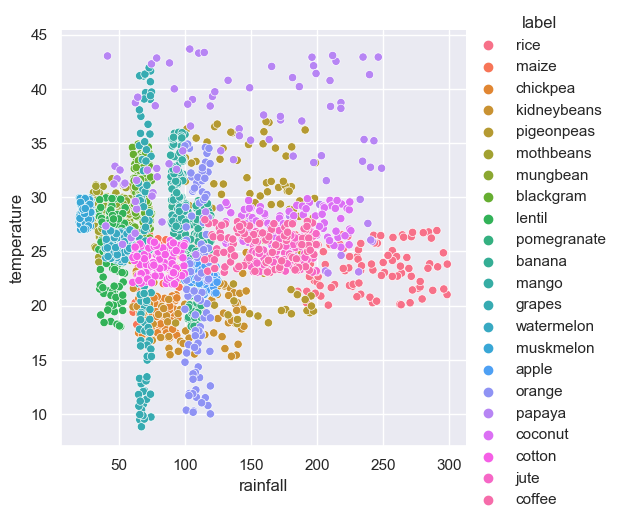

In [19]:
sns.relplot(x='rainfall', y='temperature', data=df, hue= 'label', kind='scatter', height=5)
plt.show()

In [20]:
df['label'].nunique()

22

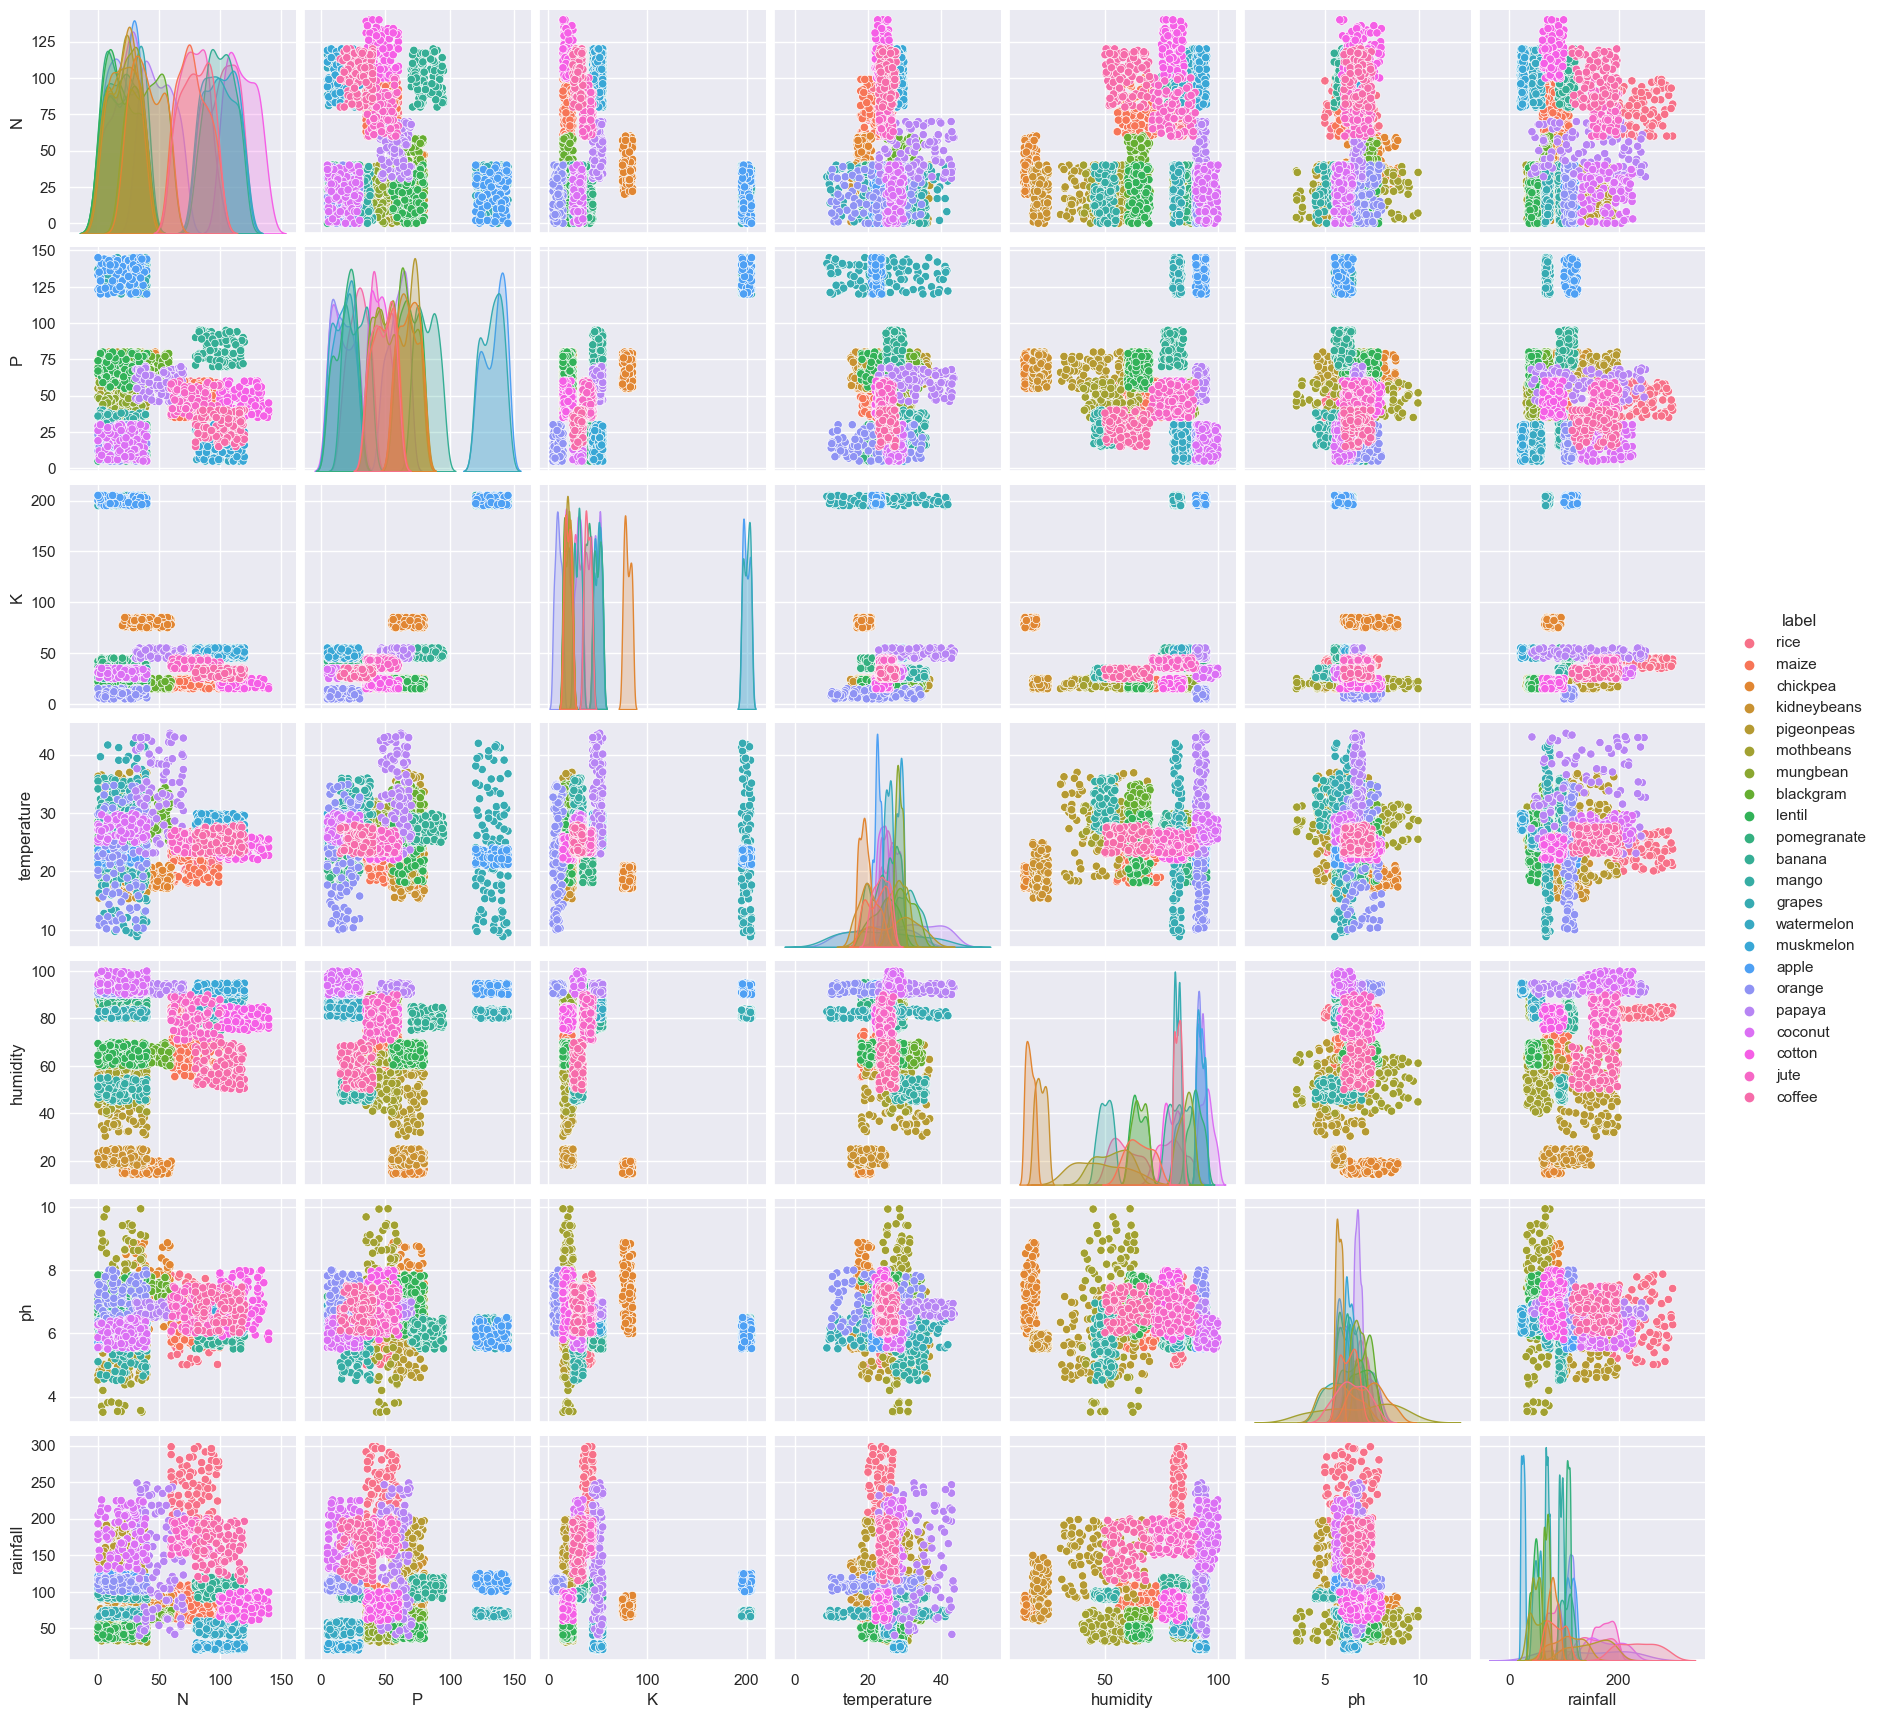

In [21]:
sns.pairplot(data=df, hue='label')
plt.show()

In [22]:
crops= df['label'].unique()
print(len(crops))
print(crops)
print(df['label'].value_counts())


22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [23]:
# it is a balanced data

In [24]:
for i in crops:
    print(i)

rice
maize
chickpea
kidneybeans
pigeonpeas
mothbeans
mungbean
blackgram
lentil
pomegranate
banana
mango
grapes
watermelon
muskmelon
apple
orange
papaya
coconut
cotton
jute
coffee


In [25]:
#filtering each unique label and storing it in a list df2

In [26]:
df[df['label']=='rice']

N   P   K  temperature   humidity        ph    rainfall label
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
..  ..  ..  ..          ...        ...       ...         ...   ...
95  88  46  42    22.683191  83.463583  6.604993  194.265172  rice
96  93  47  37    21.533463  82.140041  6.500343  295.924880  rice
97  60  55  45    21.408658  83.329319  5.935745  287.576694  rice
98  78  35  44    26.543481  84.673536  7.072656  183.622266  rice
99  65  37  40    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 8 columns]

In [27]:
df2=[]
for i in crops:
    df2.append(df[df['label']==i])
df2

[     N   P   K  temperature   humidity        ph    rainfall label
 0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
 1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
 2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
 3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
 4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
 ..  ..  ..  ..          ...        ...       ...         ...   ...
 95  88  46  42    22.683191  83.463583  6.604993  194.265172  rice
 96  93  47  37    21.533463  82.140041  6.500343  295.924880  rice
 97  60  55  45    21.408658  83.329319  5.935745  287.576694  rice
 98  78  35  44    26.543481  84.673536  7.072656  183.622266  rice
 99  65  37  40    23.359054  83.595123  5.333323  188.413665  rice
 
 [100 rows x 8 columns],
       N   P   K  temperature   humidity        ph    rainfall  label
 100  71  54  16    22.613600  63.690706  5.749914   87.759539  maize
 101  61  44  17 

In [28]:
df2[0]

N   P   K  temperature   humidity        ph    rainfall label
0   90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1   85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2   60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3   74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4   78  42  42    20.130175  81.604873  7.628473  262.717340  rice
..  ..  ..  ..          ...        ...       ...         ...   ...
95  88  46  42    22.683191  83.463583  6.604993  194.265172  rice
96  93  47  37    21.533463  82.140041  6.500343  295.924880  rice
97  60  55  45    21.408658  83.329319  5.935745  287.576694  rice
98  78  35  44    26.543481  84.673536  7.072656  183.622266  rice
99  65  37  40    23.359054  83.595123  5.333323  188.413665  rice

[100 rows x 8 columns]

In [29]:
df2[15]

N    P    K  temperature   humidity        ph    rainfall  label
1500  24  128  196    22.750888  90.694892  5.521467  110.431786  apple
1501   7  144  197    23.849401  94.348150  6.133221  114.051249  apple
1502  14  128  205    22.608010  94.589006  6.226290  116.039659  apple
1503   8  120  201    21.186674  91.134357  6.321152  122.233323  apple
1504  20  129  201    23.410447  91.699133  5.587906  116.077793  apple
...   ..  ...  ...          ...        ...       ...         ...    ...
1595  40  120  197    23.805938  92.488795  5.889481  119.633555  apple
1596  25  132  198    22.319441  90.851744  5.732758  100.117344  apple
1597  31  137  196    22.144641  93.825674  6.400321  120.631078  apple
1598  36  144  196    23.651676  94.505288  6.496934  115.361127  apple
1599  10  140  197    22.169395  90.271856  6.229499  124.468311  apple

[100 rows x 8 columns]

## sweetviz


In [30]:
!pip install sweetviz

In [31]:
import sweetviz as sv 

In [32]:
report= sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             | | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# autoviz

In [33]:
!pip install autoviz==0.0.6

Imported AutoViz_Class. Call by using AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Shape of your Data Set: (2200, 8)
Classifying variables in data set...
    8 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10
Could not draw Bar Plots
Time to run AutoViz (in seconds) = 3.673


N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]

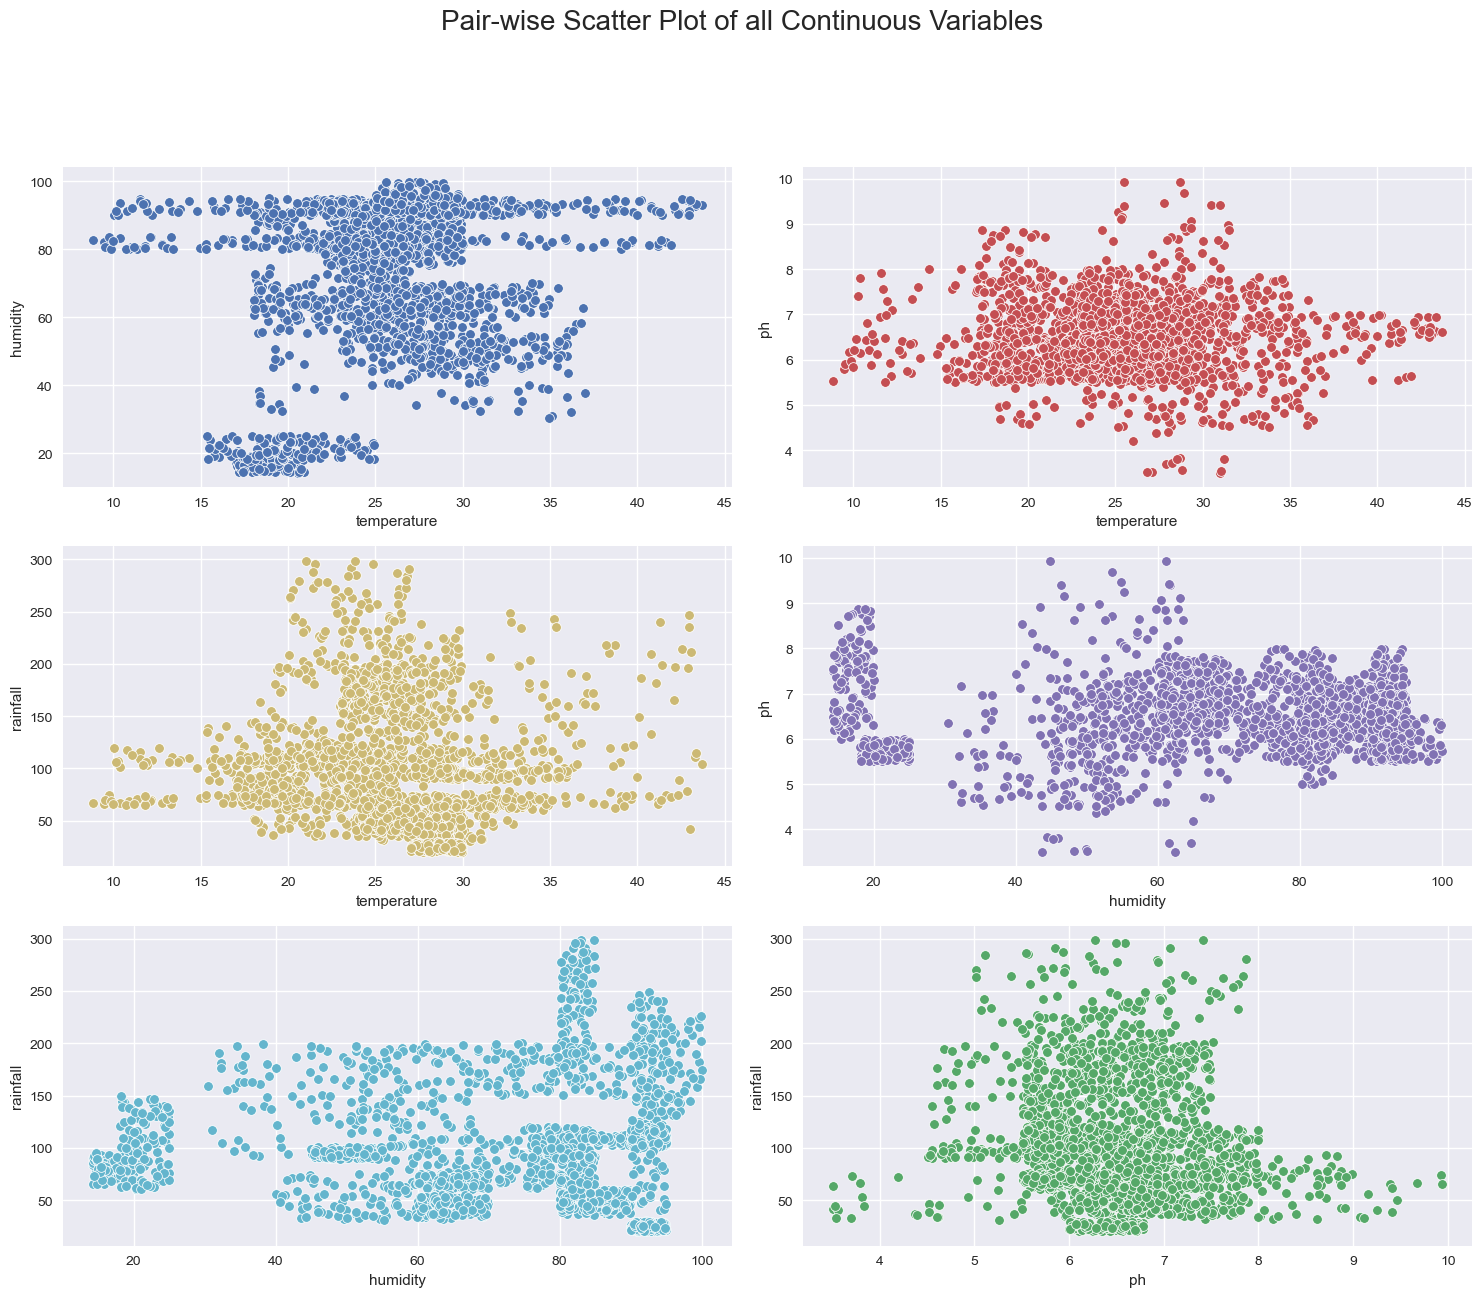

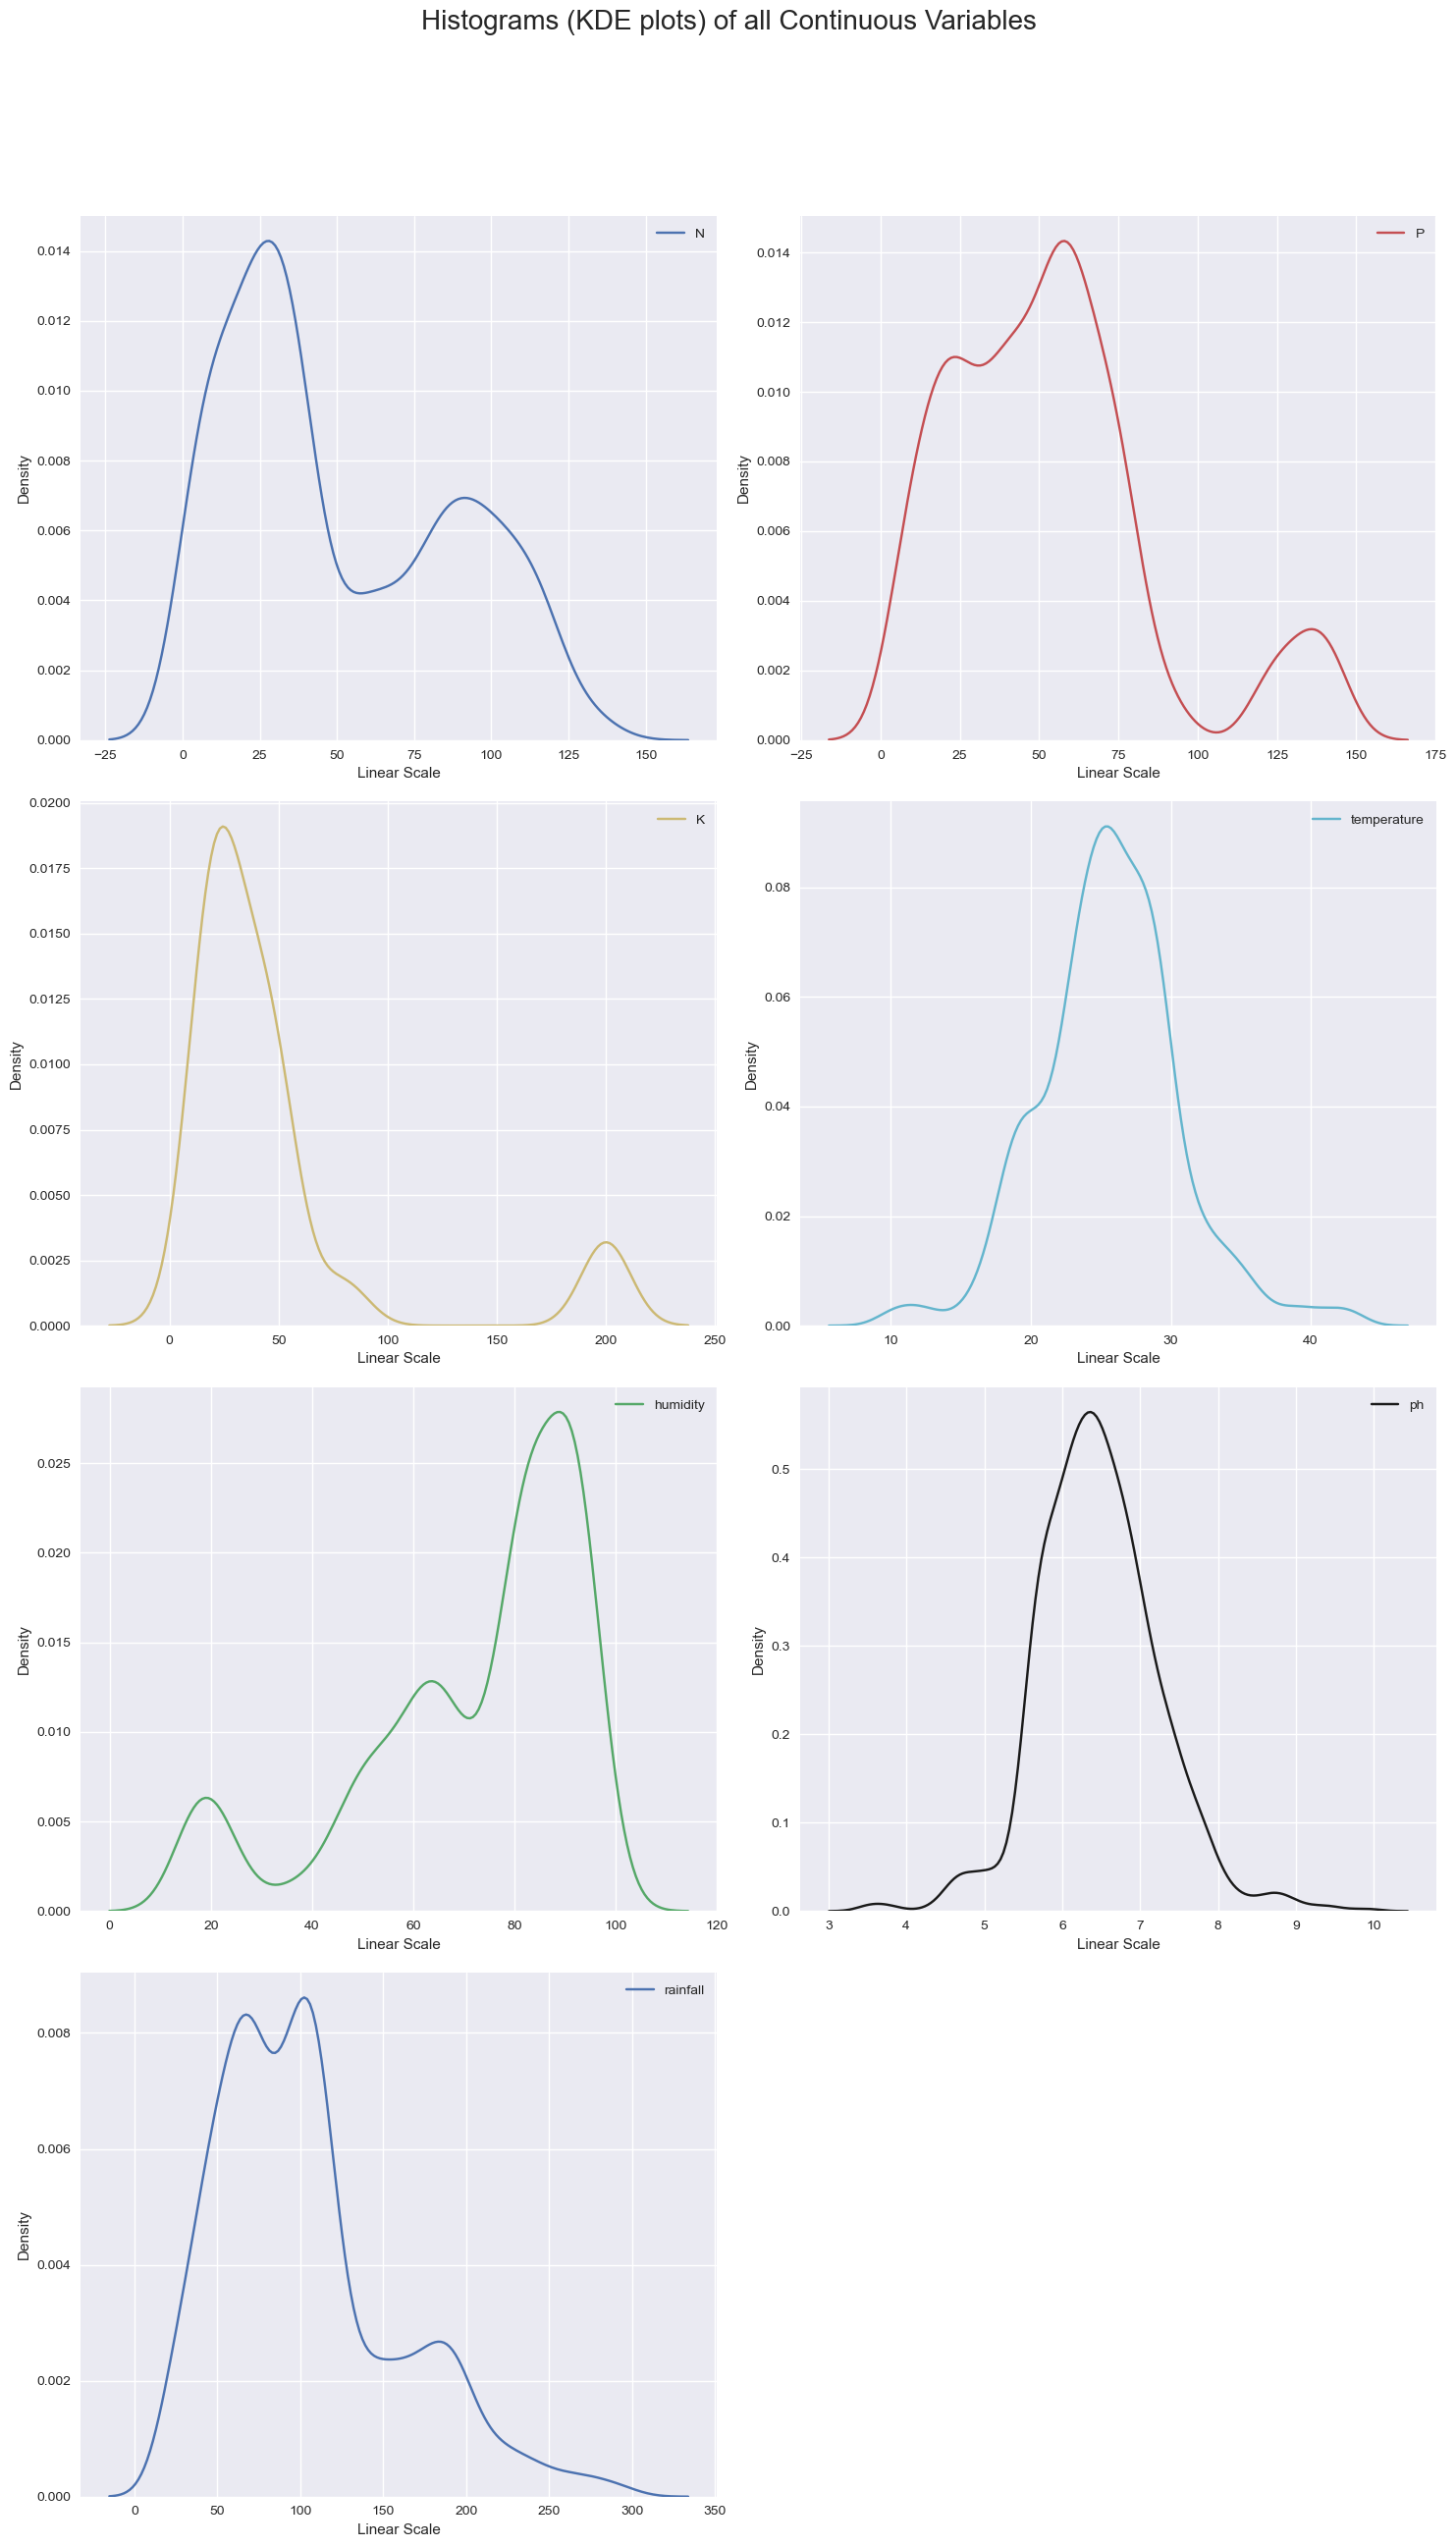

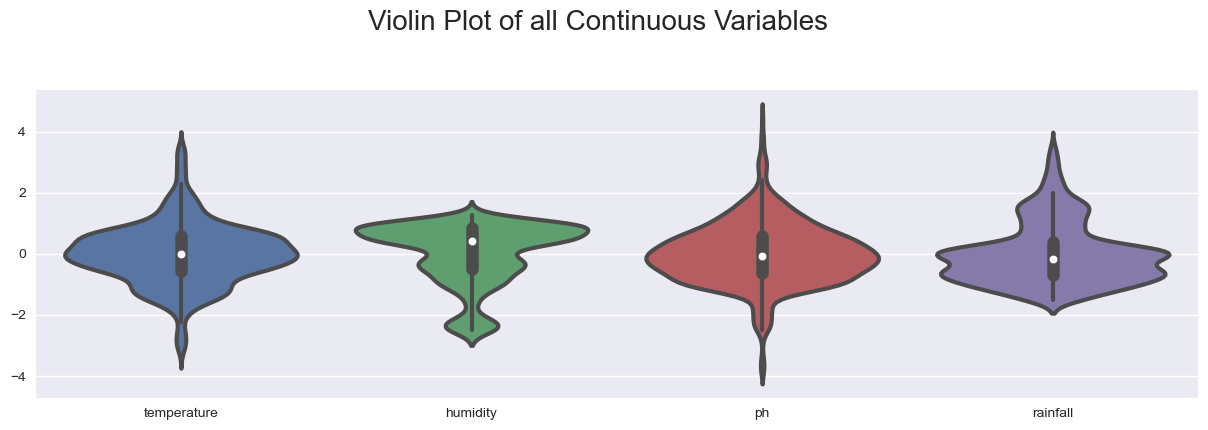

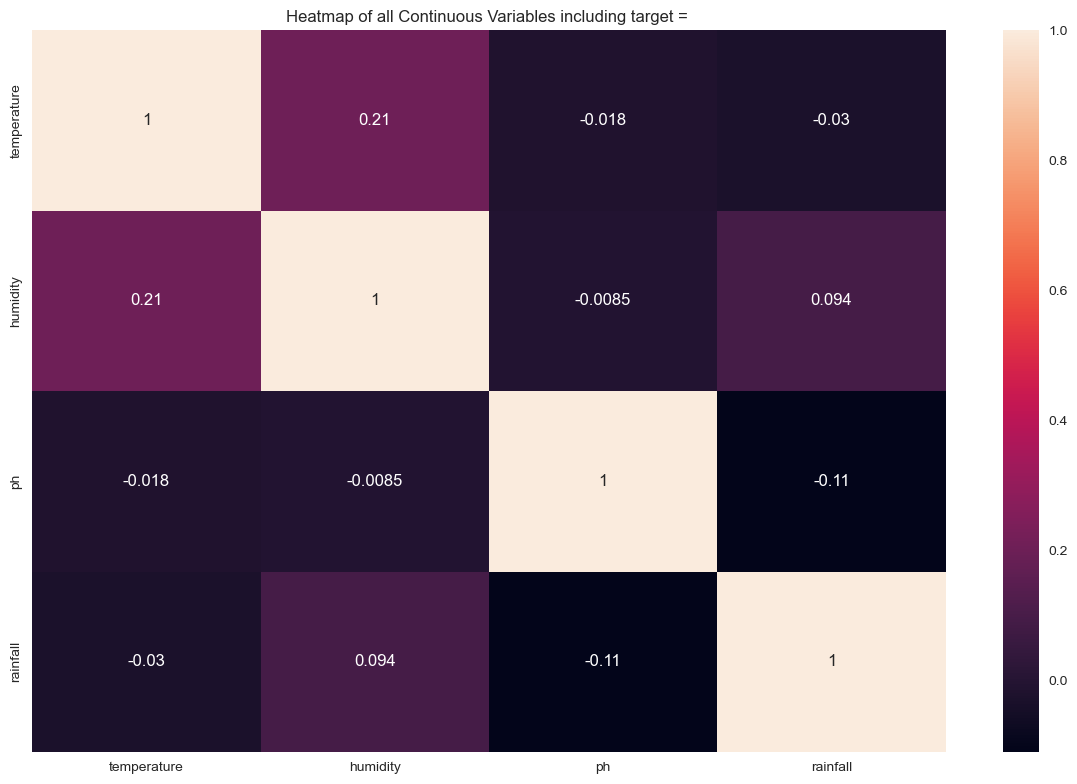

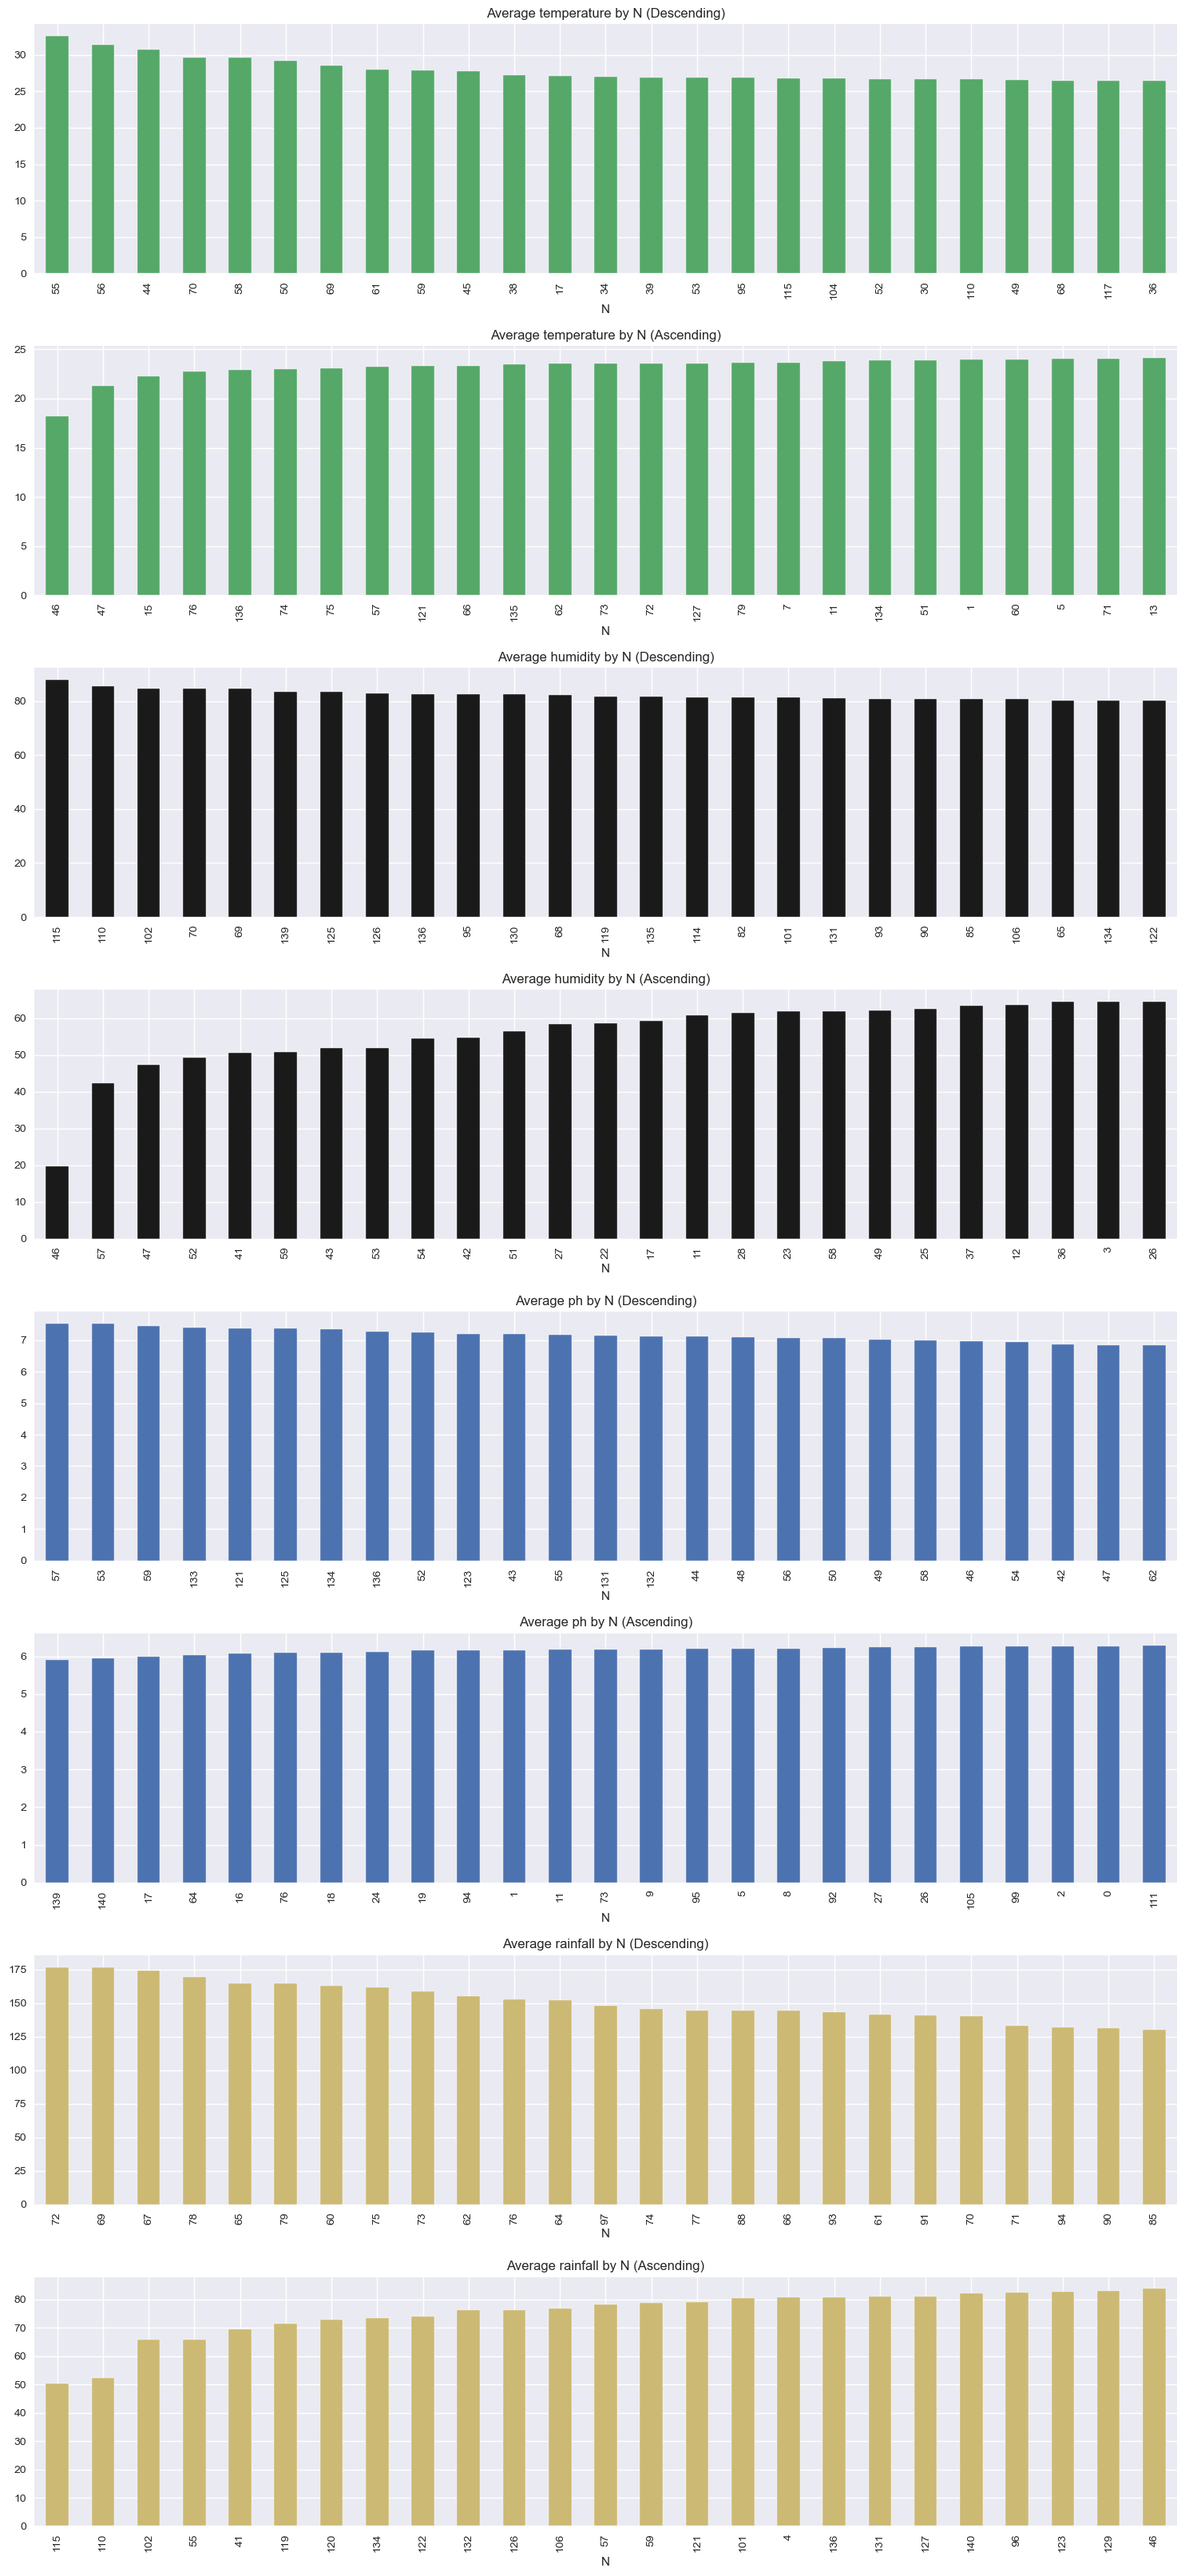

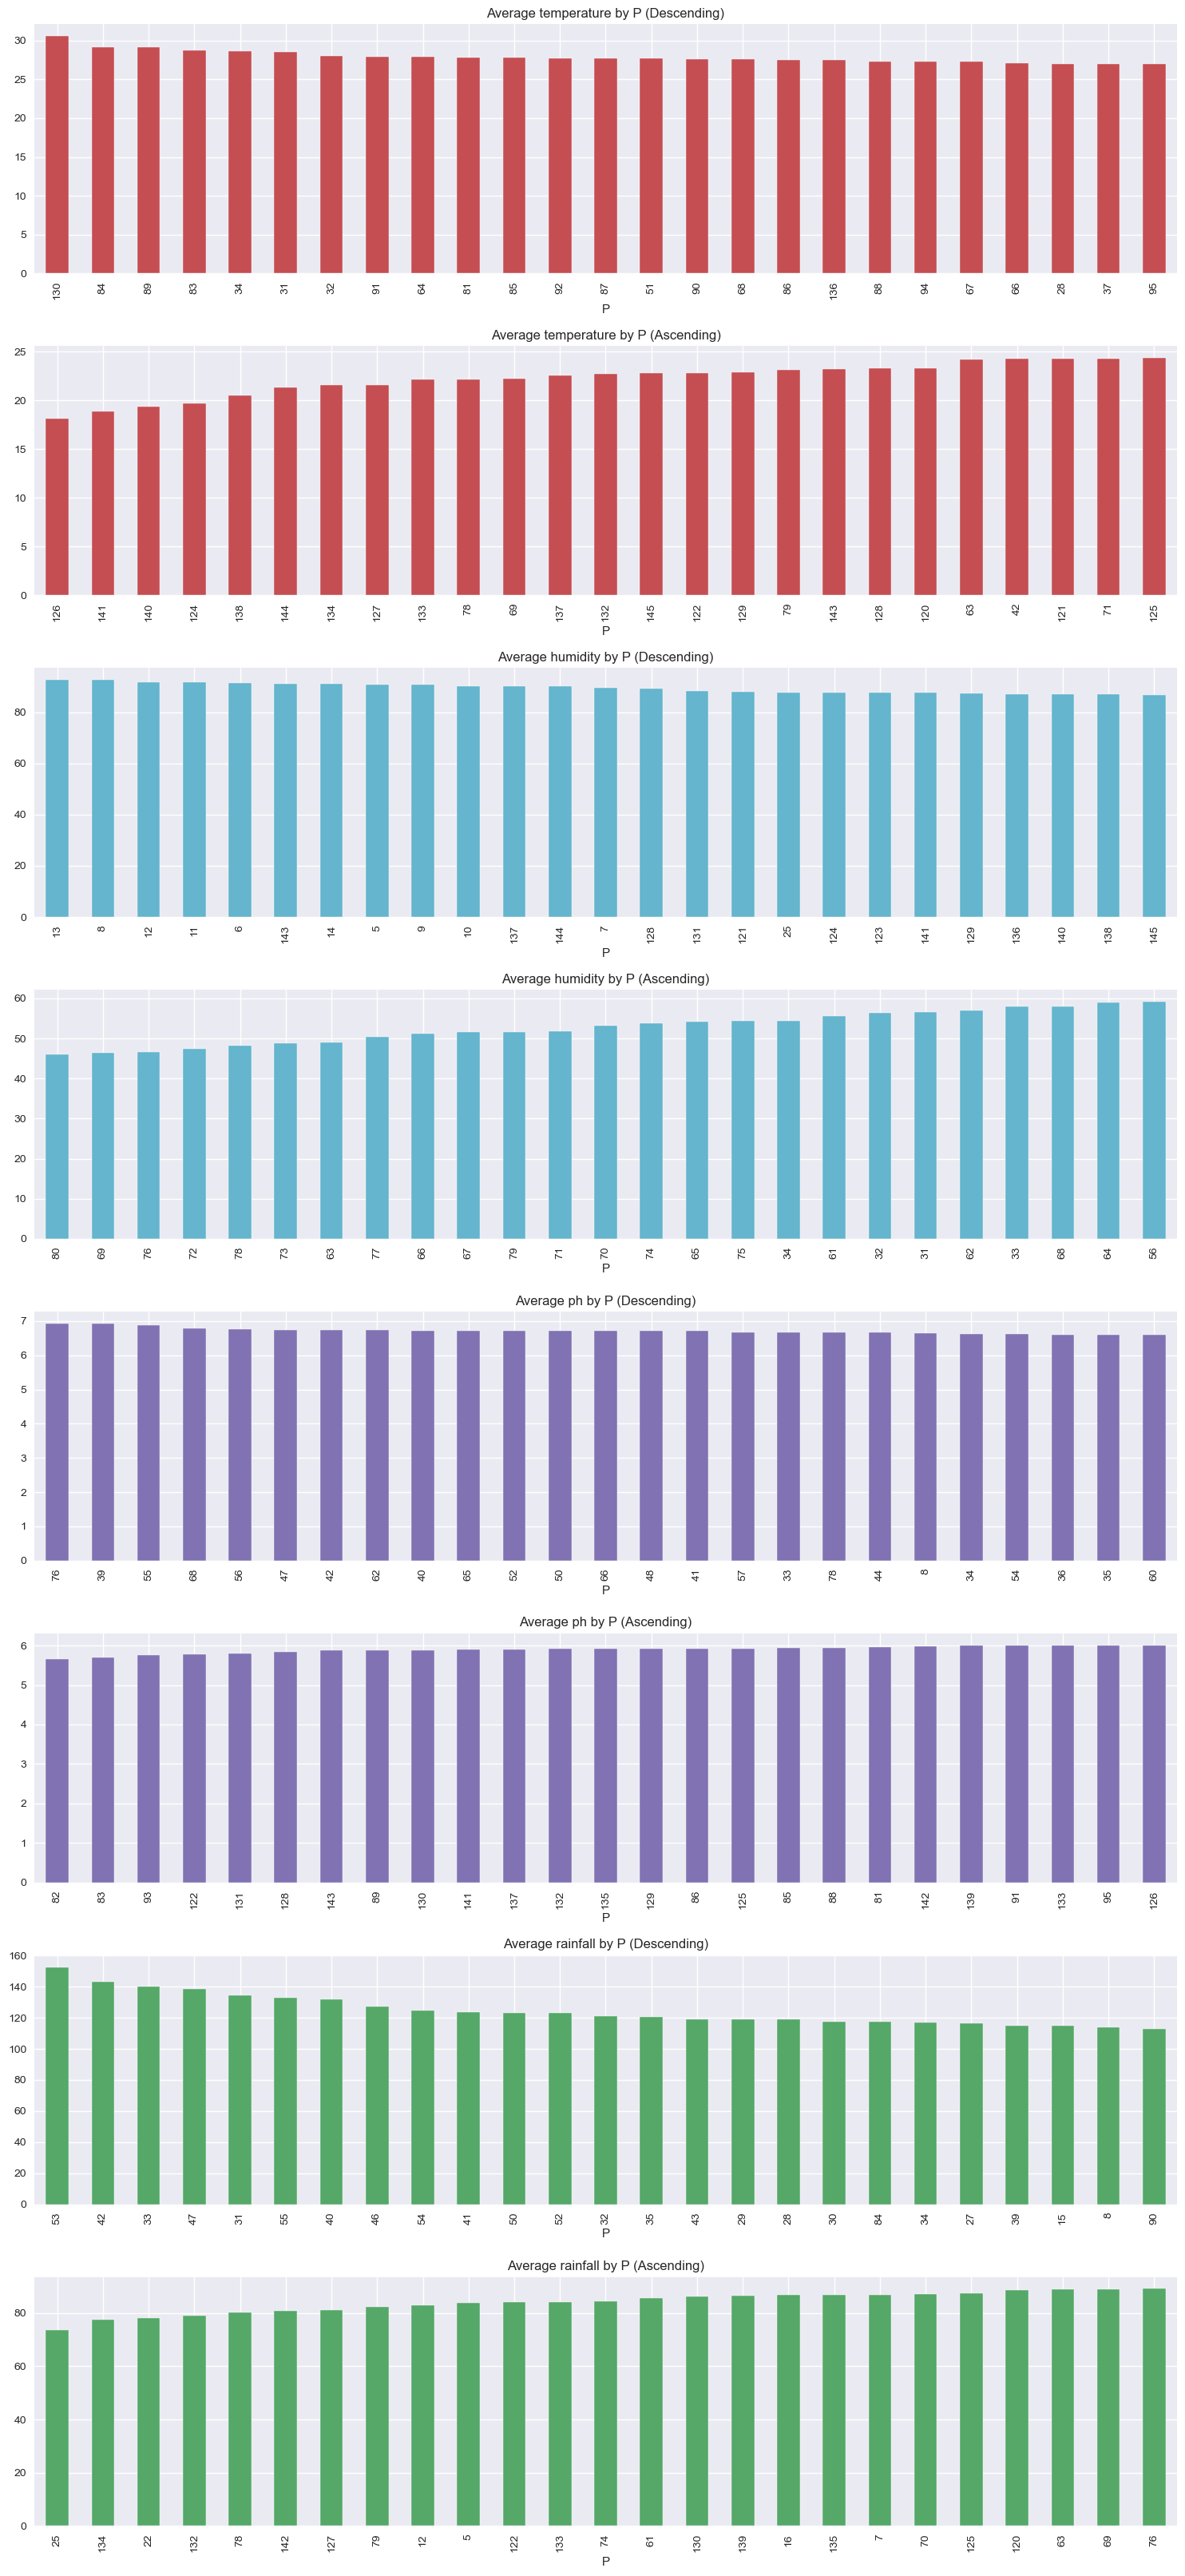

<Figure size 1500x4800 with 0 Axes>

In [34]:
from autoviz.AutoViz_Class import AutoViz_Class
autoviz= AutoViz_Class()
autoviz.AutoViz(filename='', dfte=df)

In [35]:
# ! pip install --upgrade autoviz

In [36]:
# import autoviz
# print(autoviz.__version__)

In [37]:
# from autoviz.AutoViz_Class import AutoViz_Class
# autoviz= AutoViz_Class()
# autoviz.AutoViz(filename='', dfte=df)

it is showing the same result after upgrading, so we can try on google colab

# Automation for Model Building

In [38]:
# PYCARET PACKAGE

In [39]:
!pip install pycaret

In [40]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [41]:
data= df.sample(frac=0.8, random_state=42).reset_index(drop=True) # training data=80%
data_unseen = df.drop(data.index).reset_index(drop=True) # testing data=20%

In [42]:
print(data.shape)
print(data_unseen.shape)

(1760, 8)
(440, 8)


In [43]:
from pycaret.classification import *

In [44]:
classification_model= setup(data=data, target= 'label', session_id=123)

In [45]:
compare_models()

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
rf= create_model('rf')

In [47]:
# hyperparameters tuning

In [48]:
tuned_rf= tune_model(rf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


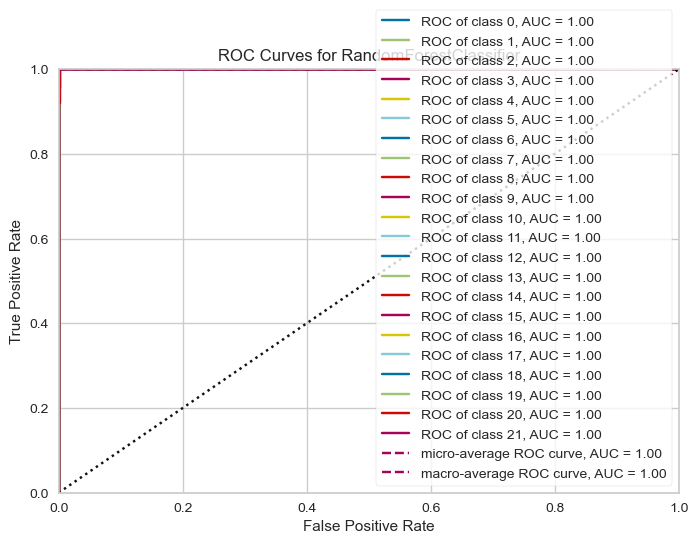

In [49]:
plot_model(tuned_rf, plot='auc')

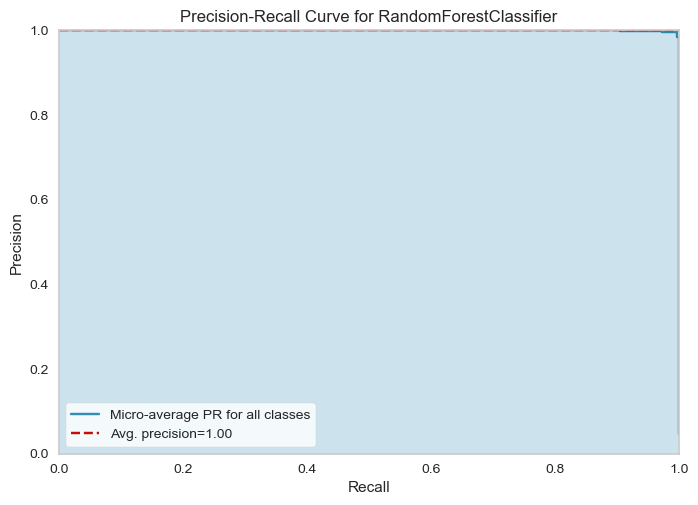

In [50]:
plot_model(tuned_rf, plot='pr') # precision value

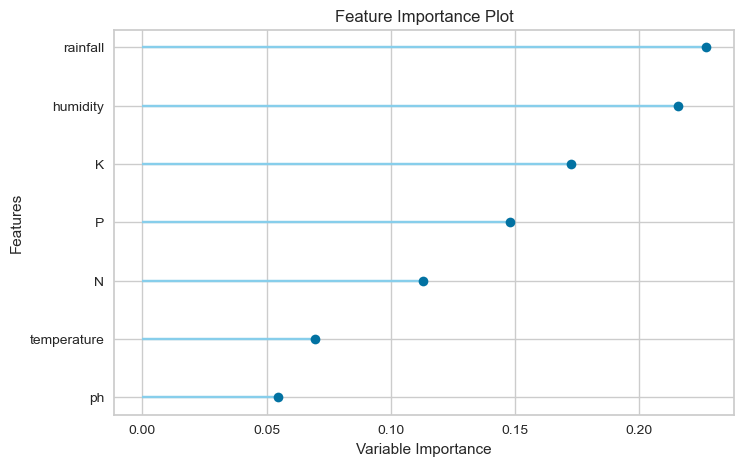

In [51]:
plot_model(tuned_rf, plot='feature')

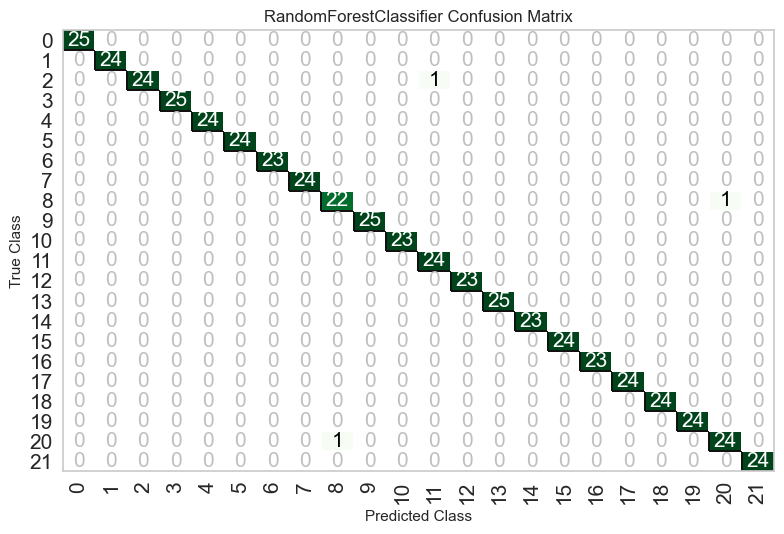

In [52]:
plot_model(tuned_rf, plot='confusion_matrix')

In [55]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
predict_model(tuned_rf)

N   P   K  temperature   humidity        ph    rainfall        label  \
1755   74  55  19    18.050337  62.893669  6.288868   84.236137        maize   
1149  102  25  50    28.204807  92.914406  6.099662   20.360012    muskmelon   
838    73  45  21    24.605322  73.588684  6.636803   96.591949        maize   
969    15  27  28    33.803986  46.128662  4.507524   90.825493        mango   
481    12  61  19    19.331627  24.139950  5.655727   68.512535  kidneybeans   
...   ...  ..  ..          ...        ...       ...         ...          ...   
1365   14  67  22    23.825768  24.754850  5.624690   84.641434  kidneybeans   
735    23  58  19    24.170933  58.252045  5.243635   59.189533    mothbeans   
345    40  70  20    31.801302  45.031860  5.623490  147.036148   pigeonpeas   
324    48  65  78    17.437326  14.338474  7.861128   73.092667     chickpea   
623    20  28  26    26.379784  91.498833  5.547595  167.047104      coconut   

     prediction_label  prediction_score  
1755            maize              1.00  
1149        muskmelon              1.00  
838             maize              0.99  
969             mango              1.00  
481       kidneybeans              0.98  
...               ...               ...  
1365      kidneybeans              1.00  
735         mothbeans              0.63  
345        pigeonpeas              0.99  
324          chickpea              1.00  
623           coconut              0.97  

[528 rows x 10 columns]

In [57]:
unseen_predict= predict_model(tuned_rf, data_unseen)
unseen_predict.head()

N   P   K  temperature   humidity        ph    rainfall   label  \
0  49  55  51    24.872120  93.905602  6.676579  135.169449  papaya   
1  59  62  49    43.360516  93.351913  6.941497  114.778069  papaya   
2  63  58  47    26.830540  90.753799  6.864144  144.665649  papaya   
3  70  65  52    30.420122  93.126595  6.583529   75.952950  papaya   
4  63  50  52    28.645555  93.226425  6.751748  115.816391  papaya   

  prediction_label  prediction_score  
0           papaya              1.00  
1           papaya              1.00  
2           papaya              0.88  
3           papaya              0.90  
4           papaya              0.89

In [58]:
save_model(tuned_rf,'tuned_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['N', 'P', 'K', 'temperature',
                                              'humidity', 'ph', 'rainfall'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_fea...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, m